# Homework 8

## Problem 1: Air Temperature Observations in Complex Terrain (60%)

Download the file “iButtons_2008-2010.mat” from the Files/Week 08 folder on the course website. It contains hourly air temperature [°C] observations from 21 distributed sensors (iButtons) located around the watershed of the North Fork of the American River in the Sierra Nevada of California, over a period from September 2007 to July 2010. It also contains information about the sites’ names, numbers, coordinates and elevations. See Fig. 1 for a map of the sites.

![Fig1](figure1.png)

Figure 1: iButton locations and topographic shading. The sites are located around the American River canyon on the west slope of the Sierra Nevada Mountains in California. Lake Tahoe is the large flat area in the southeast portion of the map.

Data:	 iButtons_2008-2010.mat

## A.

Plot the temperature observations (AIR _TEMPERATURE) at all sites on one plot over time; use the title, xlabel, ylabel and datetick commands to label your plot and its axes. Use the zoom feature to examine the data at finer scales.
Qualitatively describe the dataset, including its minimum and maximum values, its major variability in time, and how correlated the stations appear to be with one another.

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio 
import scipy.stats as st
import matplotlib.pyplot as plt
import datetime as dt

from numpy.linalg import svd

%matplotlib inline

**Read in Files**

In [2]:
# load the ibutton data
data = sio.loadmat('iButtons_2008-2010.mat')

# convert matlab format dates to python datetimes
datenums = data['TIME'][:,0]
dates = [dt.datetime.fromordinal(int(d)) + dt.timedelta(days=d%1) - dt.timedelta(days = 366) for d in datenums]

# Unpack the rest of the data
SITE_NAMES = [name[0][0] for name in data['SITE_NAMES']]
SITE_LATS = data['SITE_LATS'][:,0]
SITE_LONS = data['SITE_LONS'][:,0]
SITE_ELEVS = data['SITE_ELEVS'][:,0]
AIR_TEMPERATURE = data['AIR_TEMPERATURE']
AIR_TEMPERATURE_ZEROMEAN = data['AIR_TEMPERATURE_ZEROMEAN']

nt = data['nt'][0][0] # size in the t dimension
nx = data['nx'][0][0] # size in the x dimension (number of sites)

E:\tools\py\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


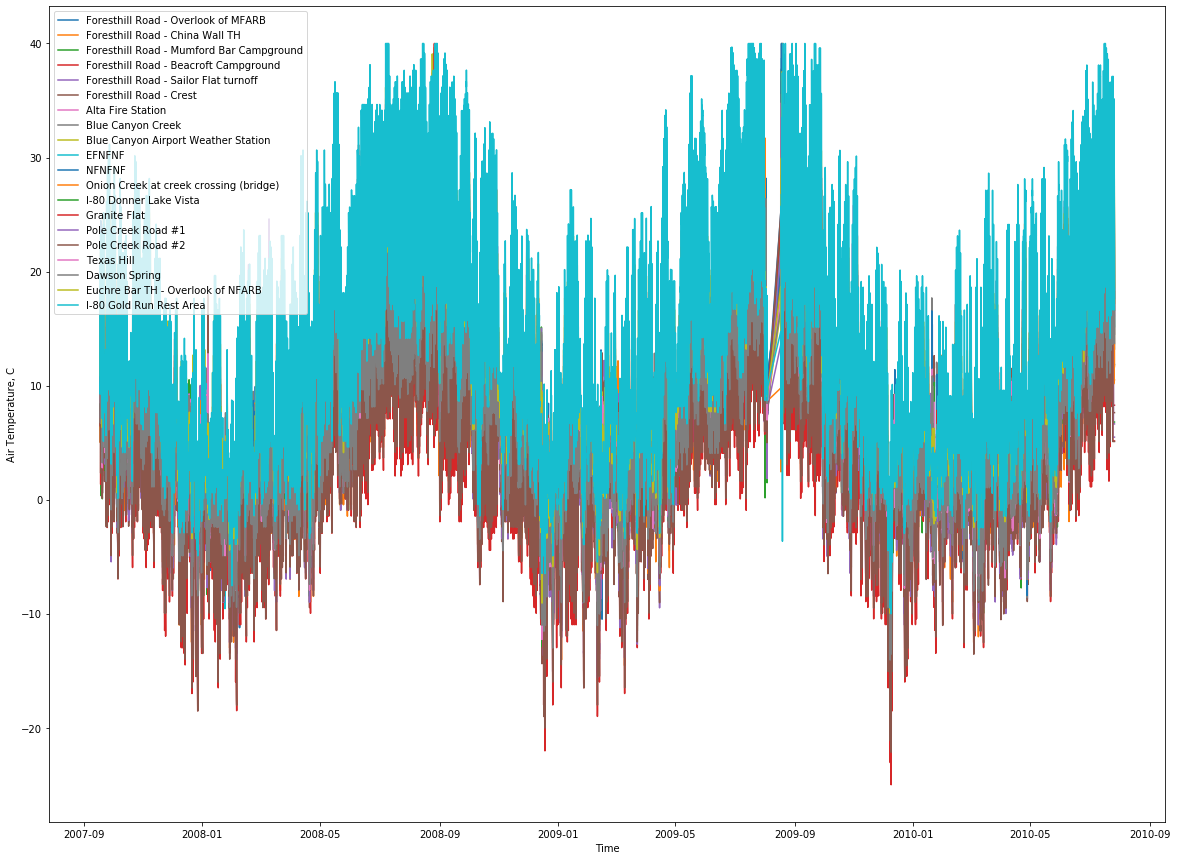

In [3]:
#site = 0 # plot the first site of 21

plt.figure(figsize=(20,15))
for site in range(0,20):
    plt.plot(dates,AIR_TEMPERATURE[:,site],label=SITE_NAMES[site])
plt.legend(loc='best')
plt.ylabel('Air Temperature, C')
plt.xlabel('Time');

# use xlim to set x axis limits to zoom in
# comment xlim out to plot the entire timeseries
#plt.xlim((dates[100], dates[500])); 


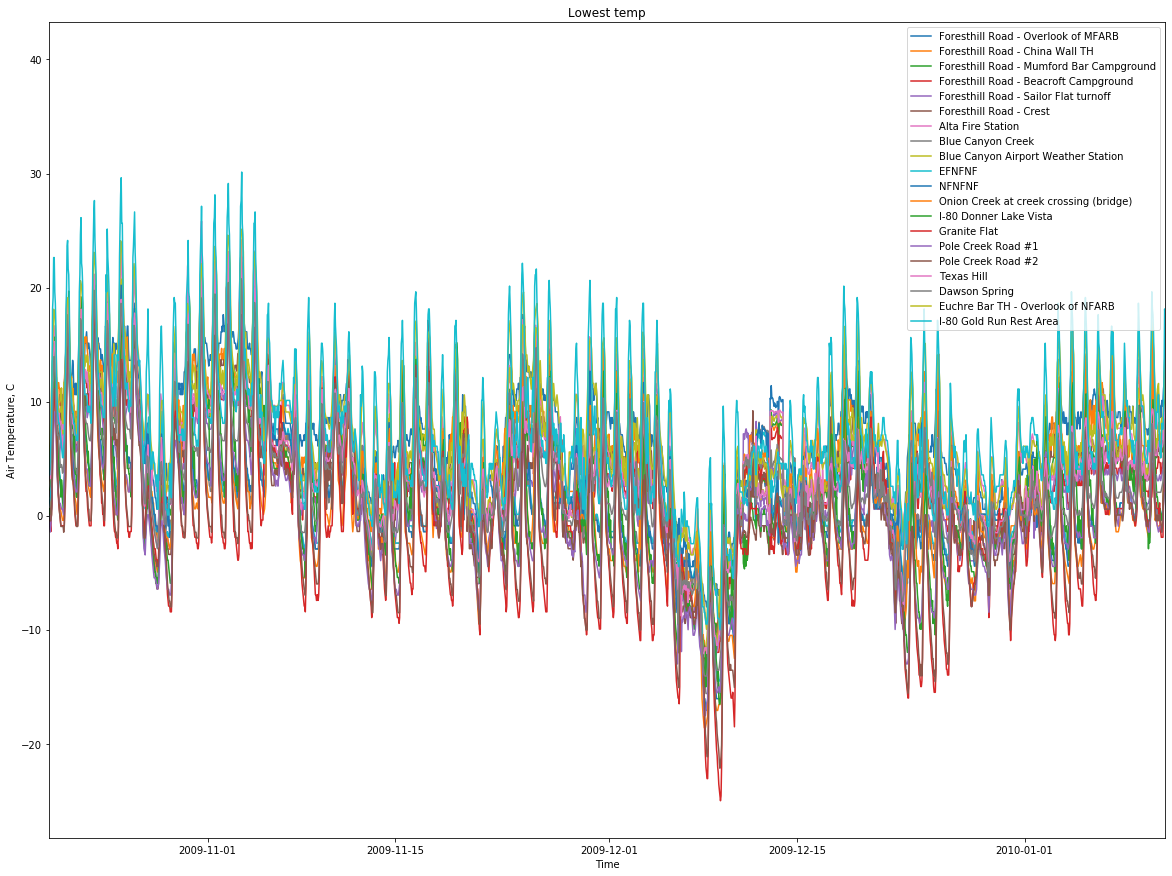

In [4]:
#site = 0 # plot the first site of 21

plt.figure(figsize=(20,15))
for site in range(0,20):
    plt.plot(dates,AIR_TEMPERATURE[:,site],label=SITE_NAMES[site])
plt.legend(loc='best')
plt.ylabel('Air Temperature, C')
plt.xlabel('Time');
plt.title('Lowest temp')

# use xlim to set x axis limits to zoom in
# comment xlim out to plot the entire timeseries
plt.xlim((dates[18000], dates[20000])); 

Qualitatively describe the dataset, including its minimum and maximum values, its major variability in time, and how correlated the stations appear to be with one another.
 
According to the figures, we can roughly tell that the temperature approximately range from -25 C to 40 C, and the major variability through out whole time happens around 2009. Also from the figures we can see that most of the stations are correlated with others pretty well.

## B.

Use the command: **[U,S,V] = svd(AIR_TEMPERATURE_ZEROMEAN,False)** to calculate the PCs, variances, and EOFs, respectively, of a version of the dataset where the mean temperature at each station has been subtracted out.

Describe how the variance is distributed among the patterns; how much is described by the leading pattern? By the second pattern?

In [5]:
[U,S,V] = svd(AIR_TEMPERATURE_ZEROMEAN,False)

In [6]:
# SVD Variance Explained
var_exp = np.full(21, np.nan);
for i in range(21):
    var_exp[i] = S[i]/np.sum(S[:]);

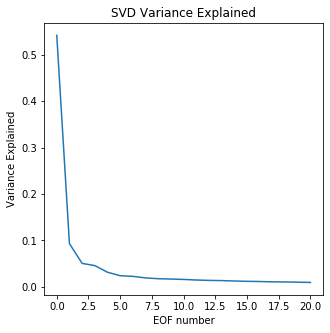

In [7]:
plt.figure(figsize=(5,5))
plt.plot(var_exp)
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
plt.title('SVD Variance Explained');

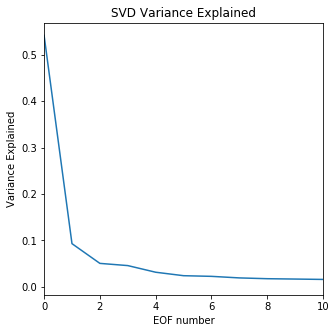

In [8]:
plt.figure(figsize=(5,5))
plt.plot(var_exp)
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
plt.title('SVD Variance Explained')
#plt.ylim([0,0.16])
plt.xlim([0,10]);

In [9]:
var_exp

array([0.54160258, 0.09314477, 0.05065499, 0.04589871, 0.03160018,
       0.02413781, 0.02272741, 0.01937334, 0.01766195, 0.01690111,
       0.01610987, 0.01483219, 0.01403512, 0.01362399, 0.01269914,
       0.012017  , 0.01160698, 0.01086698, 0.01071066, 0.01018697,
       0.00960824])

In [10]:
0.54160258-0.09314477

0.44845780999999996

As the figures showed, we can see that as more EOF included, more variaces were explained. The leading pattern explained 0.5416 variance, the second pattern explained 0.54-0.093=0.4484 variance.

## C.

Plot the leading pattern’s spatial weights (EOF) against latitude and longitude.

Describe the first pattern’s spatial weights’ sign and variability.

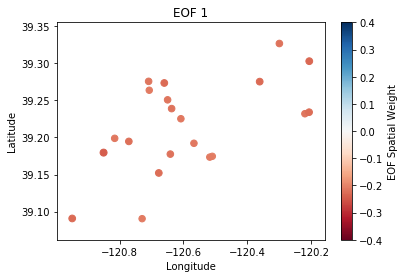

In [11]:
i = 0 # select the first EOF

# Make a scatter plot
plt.scatter(SITE_LONS,SITE_LATS,     # use longitude and latitude as the x and y values
            c=V[i,:],                # set the color map value from V
            s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
            marker='o',cmap='RdBu',  # select marker type and color map
            vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(label='EOF Spatial Weight') # add a colorbar and label it
plt.title('EOF {}'.format(i+1)) # add a title
plt.xlabel('Longitude') # x axis label
plt.ylabel('Latitude'); # y axis label

The weights' sign and variability were even spreaded out from first pattern.

## D.

Plot the leading pattern’s temporal weights (PCs). When are they positive and when are they negative?

Consider the PCs’ sign and magnitude, and consider the sign of the EOF in Part C. When does this pattern generate warmer-than-normal temperatures? Colder-thannormal temperatures? Are the anomalies associated with this pattern of the same sign at all sites?

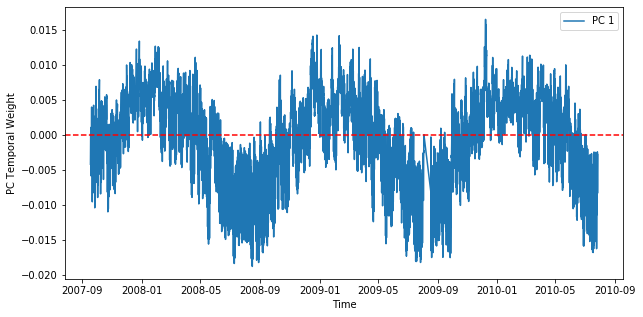

In [12]:

i = 0 # select the first PC

plt.figure(figsize=(10,5))
plt.plot(dates,U[:,i],
         label='PC {}'.format(i+1))
#plt.xlim((dates[100], dates[500]))
plt.axhline(0,linestyle='--',color='r')
plt.legend()
plt.ylabel('PC Temporal Weight')
plt.xlabel('Time');

As showed above, every year, approximately from May to October PCs are negtive, from November to March approximately positive. Rest of the time it looks be around zero. Thus combine with EOF, we can tell that when PCs are negtive it generate warmer than normal temperature and positive PCs suggest the cooler than normal temperature. All the sites share this same pattern.

## E.

Repeat C) and D) for the 2nd-leading pattern.

Interpret physically what the first two patterns may represent. How much of the dataset is described by the first two modes of variability?

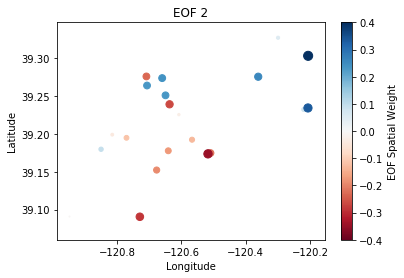

In [13]:
i = 1 # select the first EOF

# Make a scatter plot
plt.scatter(SITE_LONS,SITE_LATS,     # use longitude and latitude as the x and y values
            c=V[i,:],                # set the color map value from V
            s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
            marker='o',cmap='RdBu',  # select marker type and color map
            vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(label='EOF Spatial Weight') # add a colorbar and label it
plt.title('EOF {}'.format(i+1)) # add a title
plt.xlabel('Longitude') # x axis label
plt.ylabel('Latitude'); # y axis label

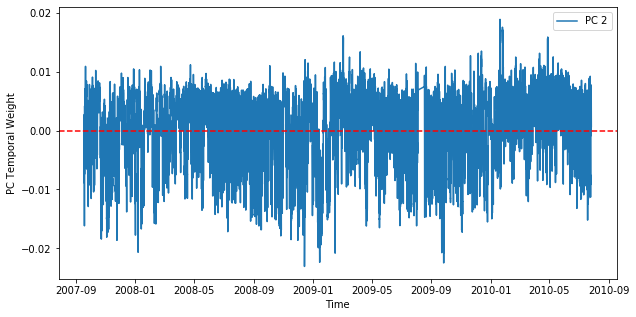

In [14]:

i = 1 # 

plt.figure(figsize=(10,5))
plt.plot(dates,U[:,i],
         label='PC {}'.format(i+1))
#plt.xlim((dates[100], dates[500]))
plt.axhline(0,linestyle='--',color='r')
plt.legend()
plt.ylabel('PC Temporal Weight')
plt.xlabel('Time');

Interpret physically what the first two patterns may represent. How much of the dataset is described by the first two modes of variability?

## A.

The first pattern represents the temperature variation from diffrent seasons. The second pattern represents the temperature variation from geological difference, such as south part tends to have higher temperature. According to previous question, about 91% variances were explained by the first two modes of variability.

# Problem 2: Timeseries Analysis (35%)

Download the file “waterlevel.mat” (provided below, or from the Files/Data folder of the course website). It contains hourly measurements of water level (Level, in cm) from an unidentified site for one year. The sampling frequency, sf, is 24, and the timeseries, t, is in days. Plot the data and zoom in to see what’s going on. Use the timeseries analysis techniques we discussed in lab to plot the spectral density of this data. Do this both for the entire timeseries and for four equal-sized chunks of the data. From these plots, identify whether the noise associated is with this data series is red noise or white noise, and identify at what frequencies the timeseries varies. Based on what you find, where do you think this water level measurement was taken?

Data:	
waterlevel.mat

In [75]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
data_w = sio.loadmat('waterlevel.mat')

In [76]:
datenums = data_w['t'][0]
#dates = [dt.datetime.fromordinal(int(d)) + dt.timedelta(days=d%1) - dt.timedelta(days = 366) for d in datenums]

level=data_w['Level'][0]
n=data_w['N'][0][0]
sf=data_w['sf'][0][0]

(0, 30)

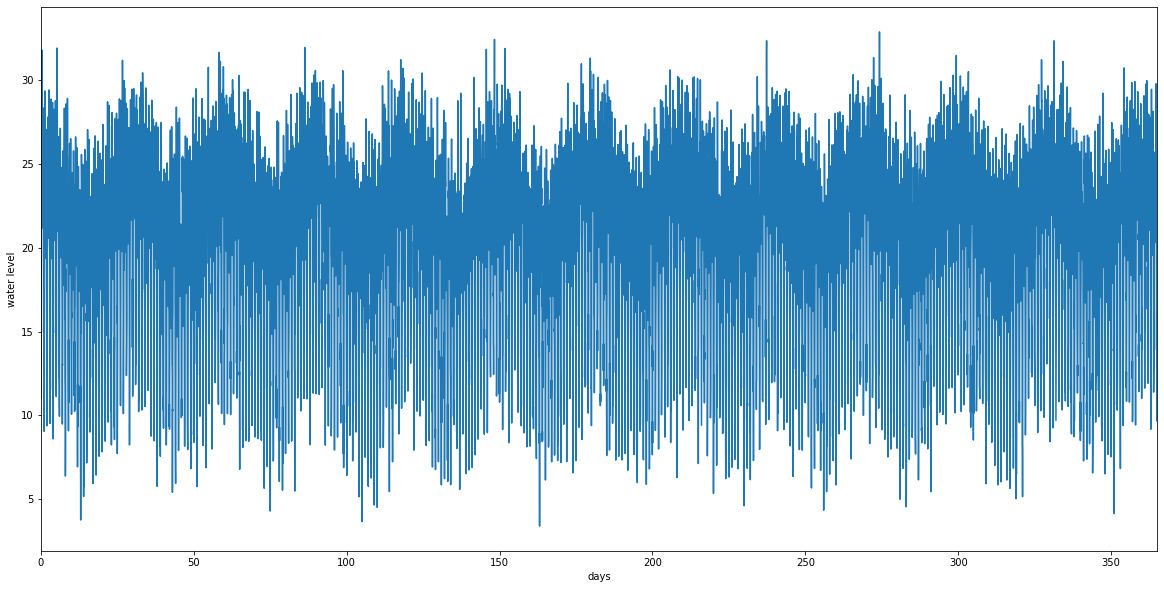

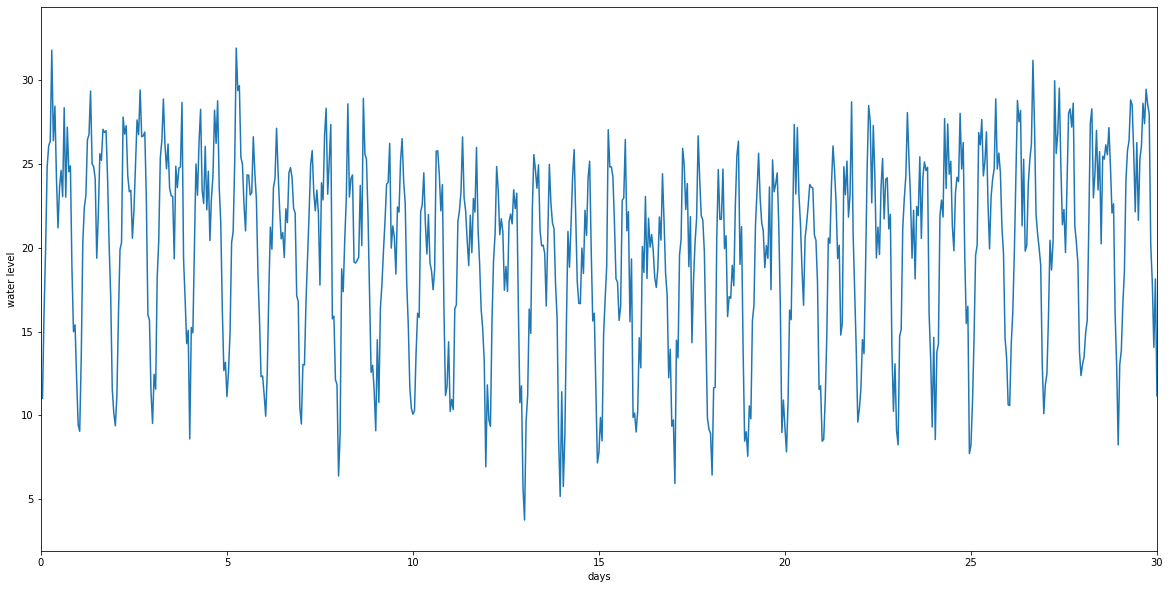

In [77]:
#original figures
plt.figure(figsize=(20,10))
plt.plot(datenums,level);
plt.xlabel('days')
plt.ylabel('water level')
plt.xlim(0,365)

#zoom in to first 30 days
plt.figure(figsize=(20,10))
plt.plot(datenums,level);
plt.xlabel('days')
plt.ylabel('water level')
plt.xlim(0,30)

In [78]:
N = len(level) # make sure it's even
print(N)

8760


In [79]:
# fft of water level
Cns = np.fft.fft(level)

sf = 24 # set our sampling frequency in times per day 
recoveredmean = Cns[0]/N

In [80]:
f = np.linspace(0,(N/2),N) * (sf/N)
a = np.zeros_like(Cns)
b = np.zeros_like(Cns)
for n in range(1,int(N/2+1)): # values are offset by one because the first one has the mean (no sine or cosine)
    a[n-1] = -Cns[n].imag / (N/2) # sine coefficients
    b[n-1] = Cns[n].real / (N/2)  # cosine coefficients

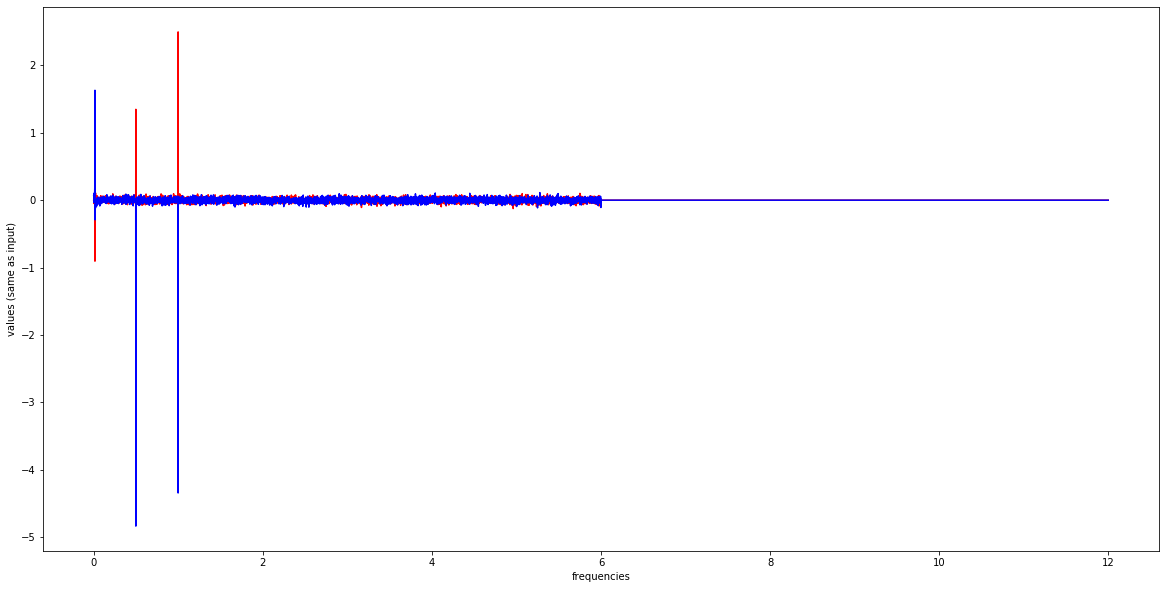

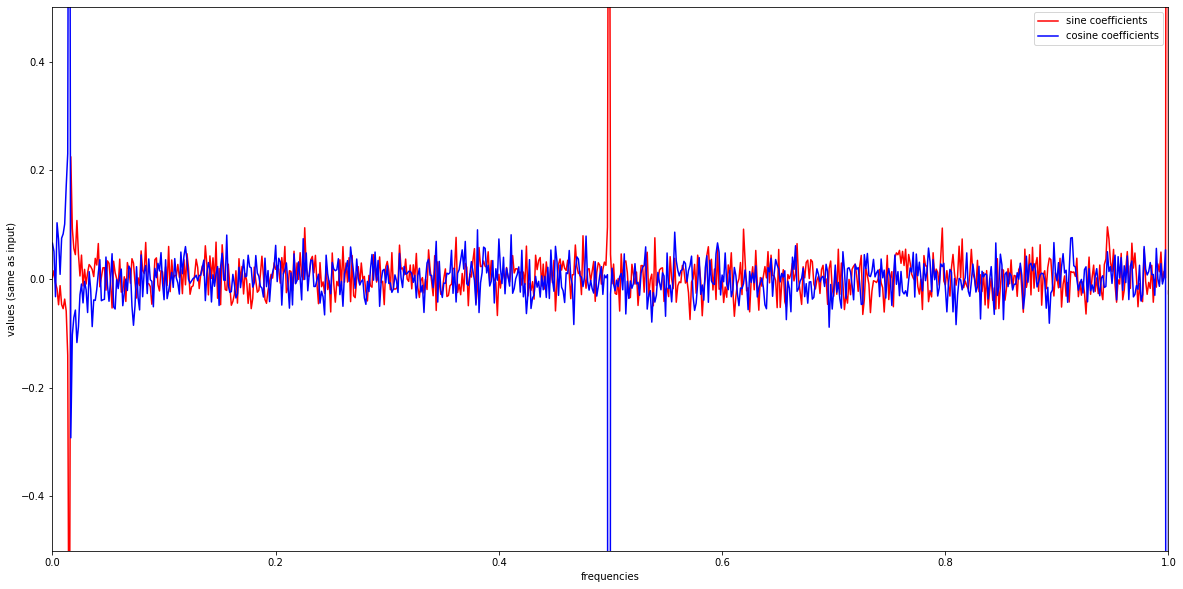

In [81]:
plt.figure(figsize=(20,10))

plt.plot(f,a,'r',label='sine coefficients')
plt.plot(f,b,'b',label='cosine coefficients')

plt.xlabel('frequencies')
plt.ylabel('values (same as input)')

plt.figure(figsize=(20,10))

plt.plot(f,a,'r',label='sine coefficients')
plt.plot(f,b,'b',label='cosine coefficients')

plt.xlabel('frequencies')
plt.ylabel('values (same as input)')
plt.xlim(0,1)
plt.ylim(-0.5,0.5)
plt.legend()

## Spectral density of the whole data:

In [72]:
p = np.abs(Cns[:N//2]) # take absolute value to "fold over" power for PSD (but only take the first half, positive frequencies)

# Create freq array (but only take the first half, positive frequencies)
_freq = np.fft.fftfreq(Cns.size, 1/sf)
freq = _freq[:N//2]

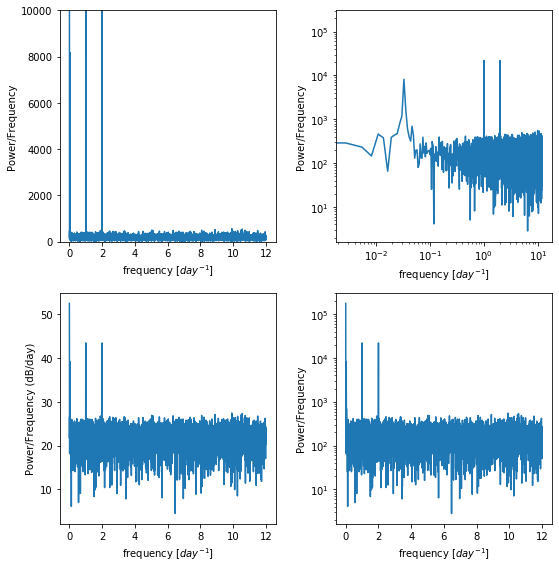

In [73]:
f, ax = plt.subplots(2,2,figsize=(8,8))
ax[0,0].plot(freq,p)
ax[0,0].set_ylim((0,10000)) # zoom in on the y axis
ax[0,0].set_ylabel('Power/Frequency')
ax[0,0].set_xlabel('frequency [$day^{-1}$]')

ax[0,1].plot(freq,p)
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_ylabel('Power/Frequency')
ax[0,1].set_xlabel('frequency [$day^{-1}$]')


ax[1,0].plot(freq,10*np.log10(p))
ax[1,0].set_ylabel('Power/Frequency (dB/day)')
ax[1,0].set_xlabel('frequency [$day^{-1}$]')

ax[1,1].plot(freq,p)
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('Power/Frequency')
ax[1,1].set_xlabel('frequency [$day^{-1}$]')

plt.tight_layout()


## Spectral density of the 4 chunks data:

In [83]:
winsize = 8760/4 # I chose this as 1/4th of a year sampled hourly, but you could change, just be even
nwin = np.floor(N/winsize)
xx = np.reshape(level,(int(winsize),int(nwin)),order='F')

In [84]:
def power_spectral_density(x, sf):
    # perform fft on x
    f = np.fft.fft(x)
    
    # take absolute value to "fold over" power for PSD (but only take the first half, positive frequencies)
    p = np.abs(f[:f.size//2]) 
    
    # Create freq array 
    _freq = np.fft.fftfreq(f.size, sf)
    # (but only take the first half, positive frequencies)
    freq = _freq[:_freq.size//2]
    return freq, p

In [85]:
Pwin = np.zeros((int(winsize/2), int(nwin)))

# Peform fft on each of the subsets of the total timeseries
for m in range(int(nwin)):
    fwin , Pwin[:,m] = power_spectral_density(xx[:,m],1/sf);  
    
p_mean = np.mean(Pwin,axis=1)

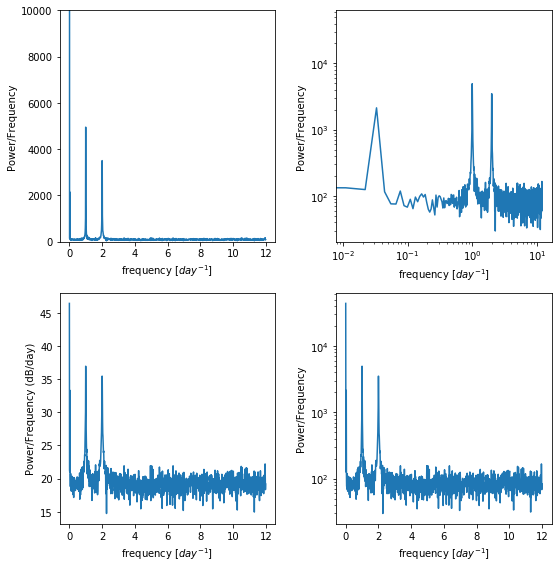

In [86]:
f, ax = plt.subplots(2,2,figsize=(8,8))
ax[0,0].plot(fwin,p_mean)
ax[0,0].set_ylim((0,10000)) # zoom in on the y axis
ax[0,0].set_ylabel('Power/Frequency')
ax[0,0].set_xlabel('frequency [$day^{-1}$]')

ax[0,1].plot(fwin,p_mean)
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_ylabel('Power/Frequency')
ax[0,1].set_xlabel('frequency [$day^{-1}$]')


ax[1,0].plot(fwin,10*np.log10(p_mean))
ax[1,0].set_ylabel('Power/Frequency (dB/day)')
ax[1,0].set_xlabel('frequency [$day^{-1}$]')

ax[1,1].plot(fwin,p_mean)
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('Power/Frequency')
ax[1,1].set_xlabel('frequency [$day^{-1}$]')

plt.tight_layout()

As from the plots above, we can tell there is a white noise associates with this data since there is no significant red noise slop observed in the plot and it varies at 0 and 2 day-1 frequency.

We can also guess that the water levels were measured within a lab-scale water shed, which not much outside interference involved.

# Problem 3: Most Useful Parts of the Course (5%)

You can highlight all of the parts of the course that you did not like in the evaluations where you are completely anonymous. Here, tell me which parts (subjects/topics) of the course you found the most useful and why. What aspects of lab or lecture most helped you learn these subjects, and how could they be made even better. [To give you perspective, each year I cut some things and add others – I want to know which things were too good to cut, and I appreciate the feedback.]

For me the most useful lecture were the hypothesis testing part, MCMC method and this lab since they correlated will with my research project. I think these topics fit well even with the students from outside of the hydrology courses, especially for the MCMC method I think it give me a great inspiration of learning some maching learning stuff. It is hard to say what to cut since I'm the traditional environment background but not from hydrology background. But I think the basic stat stuff can be packed together and incorporate some more visualization stuff.